<a href="https://colab.research.google.com/github/chiawenlyn/I_love_colab/blob/master/TF2_0_Cancer_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
print(tf.__version__)

2.0.0


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [21]:
type(data)

sklearn.utils.Bunch

In [22]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [26]:
pd_train = pd.DataFrame(X_train)
pd_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197,0.8307,1.4660,5.574,105.000,0.006248,0.03374,0.05196,0.011580,0.02007,0.004560,23.150,34.01,160.50,1670.0,0.14910,0.42570,0.61330,0.18480,0.3444,0.09782
1,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,0.1904,0.5293,1.164,13.170,0.006472,0.01122,0.01282,0.008849,0.01692,0.002817,12.320,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022
2,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,0.3013,1.8790,2.121,17.860,0.010940,0.01834,0.03996,0.012820,0.03759,0.004623,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
3,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.3530,1.735,20.200,0.004455,0.01382,0.02095,0.011840,0.01641,0.001956,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
4,14.250,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,0.7036,1.2680,5.373,60.780,0.009407,0.07056,0.06899,0.018480,0.01700,0.006113,17.670,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,11.040,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,0.1642,1.0310,1.281,11.680,0.005296,0.01903,0.01723,0.006960,0.01880,0.001941,12.090,20.83,79.73,447.1,0.10950,0.19820,0.15530,0.06754,0.3202,0.07287
377,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,0.1532,0.4690,1.115,12.680,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
378,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,0.1194,1.4340,1.778,9.549,0.005042,0.04560,0.04305,0.016670,0.02470,0.007358,12.570,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
379,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,0.3117,0.8155,1.972,27.940,0.005217,0.01515,0.01678,0.012680,0.01669,0.002330,17.500,19.25,114.30,922.8,0.12230,0.19490,0.17090,0.13740,0.2723,0.07071


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [28]:
pd_train_scaler = pd.DataFrame(X_train)
pd_train_scaler

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.271576,1.336858,1.348377,1.223781,0.787266,1.687353,1.849659,1.997088,1.426167,-0.063229,1.509489,0.424366,1.329336,1.346803,-0.235796,0.444762,0.743594,-0.034768,-0.078415,0.332187,1.475474,1.364046,1.631083,1.462721,0.821755,1.087091,1.649301,1.089607,0.860233,0.810762
1,-0.835470,-1.458586,-0.840325,-0.781085,0.205281,-0.520593,-0.698024,-0.549489,-0.129280,0.046965,-0.734181,-1.225973,-0.813176,-0.555500,-0.166404,-0.774004,-0.670106,-0.488953,-0.453928,-0.361309,-0.848677,-1.566994,-0.895781,-0.774864,0.225797,-0.636461,-0.673363,-0.412302,-0.256985,-0.165283
2,-1.397253,0.602678,-1.390727,-1.136233,-0.223626,-0.913287,-0.604556,-0.936801,-0.418579,0.508877,-0.345577,1.152016,-0.348236,-0.458344,1.217721,-0.388675,0.310165,0.171452,2.010152,0.357253,-1.379820,-0.108872,-1.369318,-1.073271,-0.916830,-1.060893,-0.900801,-1.367164,-0.725243,-0.514108
3,-0.203930,0.686054,-0.229137,-0.285597,-0.575994,-0.502948,-0.508019,-0.384100,0.021004,-0.786287,-0.582103,0.225275,-0.535767,-0.409870,-0.791243,-0.633294,-0.376458,0.008472,-0.514725,-0.703880,-0.241351,1.004036,-0.258764,-0.329562,-0.652458,-0.508604,-0.191905,0.215938,-0.040141,-0.778083
4,0.014238,0.651314,0.166803,-0.043008,0.678956,1.924577,1.614390,1.001333,0.547001,1.589691,1.064119,0.075516,1.231684,0.430764,0.742819,2.437434,1.358701,1.112750,-0.444391,0.950086,0.299449,0.624299,0.358893,0.151542,1.489408,2.334315,2.026531,0.992361,-0.082567,1.663692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,-0.907236,-1.020857,-0.905274,-0.824906,-1.128375,-0.624305,-0.662095,-0.728552,0.749886,0.010737,-0.825988,-0.342046,-0.756334,-0.586366,-0.530713,-0.351332,-0.510821,-0.803106,-0.229812,-0.709848,-0.898036,-0.802589,-0.850916,-0.794057,-0.952677,-0.338756,-0.540448,-0.720401,0.479970,-0.572892
377,-0.376168,-1.440058,-0.438140,-0.414768,-1.873547,-1.281082,-0.826527,-0.965987,-1.752356,-0.993091,-0.864533,-1.332214,-0.836982,-0.565651,-0.705742,-0.653318,-0.536466,-0.978560,-0.540951,-0.654145,-0.569693,-1.672202,-0.615223,-0.554335,-1.550428,-0.862089,-0.715915,-0.934651,-0.923230,-0.779193
378,-0.617302,0.783328,-0.568871,-0.609812,-1.887988,0.091484,-0.099878,-0.490854,-2.255811,0.634167,-0.982971,0.367986,-0.514876,-0.630511,-0.609399,1.086617,0.421773,0.811734,0.473529,1.445440,-0.795026,0.492789,-0.616452,-0.717841,-1.916517,0.433395,0.109305,-0.077344,-1.108648,0.570633
379,0.433351,-1.252460,0.399121,0.289227,-0.063328,-0.157111,-0.203192,0.286135,0.047304,-0.778740,-0.309135,-0.721727,-0.420625,-0.249532,-0.555186,-0.561315,-0.527075,0.148169,-0.481346,-0.555074,0.262966,-1.062322,0.211393,0.083815,-0.379123,-0.359439,-0.465863,0.357947,-0.272699,-0.692679


In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 3ms/sample - loss: 0.7617 - accuracy: 0.5092 - val_loss: 0.7602 - val_accuracy: 0.5160
Epoch 2/100
381/381 [==============================] - 0s 99us/sample - loss: 0.6892 - accuracy: 0.5958 - val_loss: 0.6917 - val_accuracy: 0.6011
Epoch 3/100
381/381 [==============================] - 0s 96us/sample - loss: 0.6260 - accuracy: 0.6614 - val_loss: 0.6337 - val_accuracy: 0.6596
Epoch 4/100
381/381 [==============================] - 0s 98us/sample - loss: 0.5735 - accuracy: 0.7244 - val_loss: 0.5838 - val_accuracy: 0.7021
Epoch 5/100
381/381 [==============================] - 0s 90us/sample - loss: 0.5286 - accuracy: 0.7507 - val_loss: 0.5411 - val_accuracy: 0.7447
Epoch 6/100
381/381 [==============================] - 0s 106us/sample - loss: 0.4907 - accuracy: 0.7769 - val_loss: 0.5050 - val_accuracy: 0.7819
Epoch 7/100
381/381 [==============================] - 0s 99us/sample - loss: 

In [43]:
print("Train score", model.evaluate(X_train, y_train))
print("Test score",model.evaluate(X_test,y_test))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

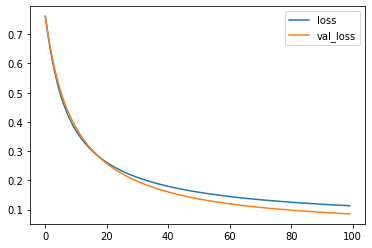

In [44]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

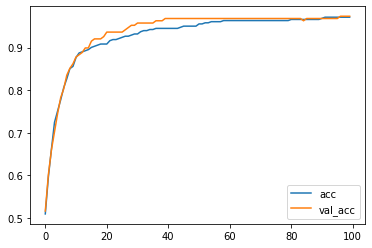

In [45]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()